<a href="https://colab.research.google.com/github/Srividhyak2011/Demo-Datascienceproject/blob/main/M2_AST_04_Model_Selection_CV_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IITM and TalentSprint
### Assignment 04: Model Selection and Cross Validation

## Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M2_AST_04_Model_Selection_CV_C" #name of the notebook

def setup():
    
#  ipython.magic("sx pip3 install torch")  

    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://adsmi-iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")

## Learning Objectives

At the end of the experiment, you will be able to:

* Understand the different Cross-validation of data
* Understand the importance and implementation of Cross-validation of ML models
* Develop an understanding of Model-Selection


## Information

Cross-Validation of Data is a resampling procedure used to evaluate machine learning models and access how the model will perform for an independent test data. Main aim is to introduce different subsets of the same data for training and testing. This simulates the randomness and helps us select a model that is more consistent and generic.

Cross-validation of Data is a technique in which we train our model using one subset (Majority) of the entire dataset for training and then evaluated using the complementary subset (Minority) of the entire dataset.

The major difference between Train-test-split is that the model is trained once on the training data and tested once on the test data.

But in CV, a model is trained for as many number of times, as much as the number of CVs are defined by the user. Typically 3, 5, 10 are used for Cross-Validation.

## Importing necessary packages for this assignment.
Lets first import the necessary packages required for this notebook.

In [ ]:
# Importing Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Importing sklearn Libraries
from sklearn import datasets
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


## **Cross-Validation (CV) of Dataset**

Cross-Validation is an important step to check the efficiency of a model and its generic behavior to new data. 

The three steps involved in cross-validation are as follows :

1.   Reserve a small portion of available dataset.
2.   Use the rest of the dataset to train the model.
3.   Test the model using the reserved portion of the dataset
4.   Repeat 1-3 for different combination of Train/test data



**Commonly used methods of Cross-Validation**

* KFold
* Repeated K-Fold
* Leave One Out (LOO)
* Leave P Out (LPO)
* Shuffle & Split
* Stratified k-fold
* Stratified Shuffle Split
* Group k-fold
* StratifiedGroupKFold
* Leave One Group Out
* Leave P Groups Out
* Group Shuffle Split
* Akaike's Information Criteria (**AIC**)
* Bayesian Information Criteria (**BIC**)

The above different CV techniques are used for regression and classification seperately.  

In this [link](https://scikit-learn.org/stable/modules/cross_validation.html), you can read about different cross-validation techniques offered by the sklearn library.

**KFold Cross-Validation**

KFold Cross-Validation divides all the samples in groups of samples, called folds of approximately equal sizes (wherever possible). The prediction function is learned using  folds, and the fold left out is used for test. 

Here $k$ is the number of folds. This $k$ is not to be confused with $kNN$


![](https://miro.medium.com/proxy/1*NyvaFiG_jXcGgOaouumYJQ.jpeg)

**Repeated K-Fold Cross-Validation**

RepeatedKFold repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.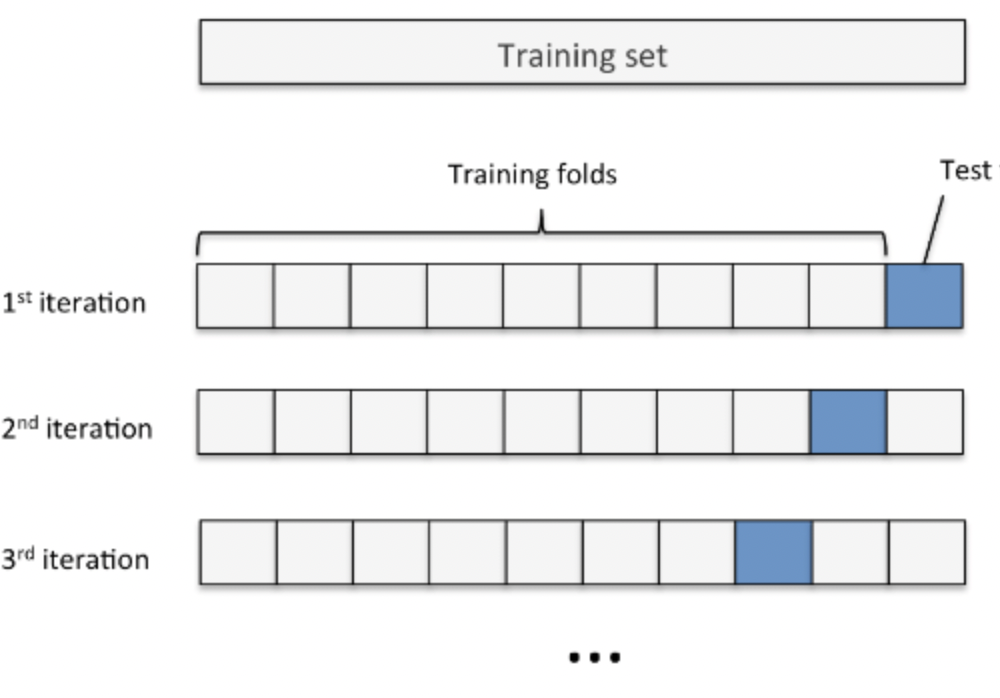

**Leave One Out (LOO) Cross-validation**

LeaveOneOut (or LOO) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for  samples, we have  different training sets and  different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set


![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/LOOCV.gif/1600px-LOOCV.gif)

**Leave P Out (LPO) Cross-Validation**
LeavePOut is very similar to LeaveOneOut as it creates all the possible training/test sets by removing  samples from the complete set. For  samples, this produces 
 train-test pairs. Unlike LeaveOneOut and KFold, the test sets will overlap for $p > 1$.

**Shuffle & Split Cross-Validation**

The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number generator.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_008.png)


**Stratified k-fold Cross-Validation**

StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.



![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_003.png)



**Stratified Shuffle Split Cross-Validation**

StratifiedShuffleSplit is a variation of ShuffleSplit, which returns stratified splits, i.e which creates splits by preserving the same percentage for each target class as in the complete set.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_012.png)

**Group k-fold Cross-Validation**

GroupKFold is a variation of k-fold which ensures that the same group is not represented in both testing and training sets. For example if the data is obtained from different subjects with several samples per-subject and if the model is flexible enough to learn from highly person specific features it could fail to generalize to new subjects. GroupKFold makes it possible to detect this kind of overfitting situations.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_007.png)

**Stratified Group KFold Cross-Validation**

StratifiedGroupKFold is a cross-validation scheme that combines both StratifiedKFold and GroupKFold. The idea is to try to preserve the distribution of classes in each split while keeping each group within a single split. That might be useful when you have an unbalanced dataset so that using just GroupKFold might produce skewed splits.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_010.png)

**Leave One Group Out Cross-Validation**

LeaveOneGroupOut is a cross-validation scheme which holds out the samples according to a user-defined array of integer groups. This group information can be used to encode arbitrary domain specific pre-defined cross-validation folds.

Each training set is thus constituted by all the samples except the ones related to a specific group.

For example, in the cases of multiple experiments, LeaveOneGroupOut can be used to create a cross-validation based on the different experiments.


**Leave P Groups Out Cross-Validation**

LeavePGroupsOut is similar as LeaveOneGroupOut, but removes samples related to $P$ groups for each training/test set

**Group Shuffle Split Cross-Validation**

The GroupShuffleSplit iterator behaves as a combination of ShuffleSplit and LeavePGroupsOut, and generates a sequence of randomized partitions in which a subset of groups are held out for each split.


![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_011.png)

## **Cross-Validation (CV) of ML Models**

A typical ML model contains a number of parameters(arguments of the function) that can be tuned to achieve its optimal performance.
It is very tiresome to change the required parameters one-by-one and check for the same.

Sklearn offers grid-search functionality that makes the lives easier through Grid-search. Here, all the chosen parameters (along with the range of values) are given to a function that is iterated. Once the models are trained using these parameters, and the results of the parameter combinations are presented to the user.

Grid-search CV is one of the common techniques.
Here the data is cross validated, along with paramteric sweeps of the model parameters.


More Information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).





##  Simple Regression base-model with train-test split

In [ ]:
# THE USUAL REGRESSION WAY WITH TRAIN TEST SPLIT

# load regression dataset
diabetes, target = load_diabetes(return_X_y=True, as_frame=True)
diabetes = pd.DataFrame(diabetes)

# Prepare data for modeling
# Separate input features and target
y = target
X = diabetes


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# Train the model using a BASE MODEL
model_lr = LinearRegression().fit(X_train, y_train)

# Make the Predictions
y_pred   = model_lr.predict(X_test)

# Get the r2-score
r2_score(y_test, y_pred)

In the above cell, we see that the r2 score is ~40%.




#### **Cross-validation Score**

We can arrange the train and test-data with 5 different combinations.
And then, we can compute the average of all the r2_scores obtained through the different dataset combinations using cross-validation score as in the following cell. The purpose of Cross-validation Score is to tell how much improvisation can be done with the base model (The model with default parameters)

In [ ]:
# Compute the Cross Validation score using the imported function "cross_val_score"
r2_scores = cross_val_score(model_lr,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')

In [ ]:
# Print the statistics of the r2 score - min, mean, max, and standard deviation
print(f"min r2_score   = { r2_scores.min()  } ")
print(f"mean r2_score  = { r2_scores.mean() } ")
print(f"max r2_score   = { r2_scores.max()  } ")
print(f"sd of r2_score = { r2_scores.std()  } ")

#### **Grid Search using Cross-Validation(CV)**

This is an approach which combines two steps in one step.
Here the Model parameters are varies for the specified values. For each model (combination of parameters), the model is cross-validated for different train/test datasets,


The model **model_lr** has the following parameters [Reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html):

* fit_intercept
* normalize
* copy_X
* n_jobs
* positive

We can test the combinations of the model parameters using GridsearchCV.
More on Grid Search CV [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).

In [ ]:
# Mention all the parameters that we want to iterate across
sweep_parameters = {'fit_intercept':[True, False], 
                    'normalize':[True, False],
                    'copy_X': [True, False],
                    'n_jobs': [None, 2, -1],
                    'positive':[True]
                   }

In [ ]:
# Define and model fit the data
model_lr_gscv = GridSearchCV(model_lr, sweep_parameters, cv=5)
model_lr_gscv.fit(X,y)

Let us check for the Cross-Validation Summary, which is a dictionary.
We can choose to check for the desired value from the dictionary.

In [ ]:
# Print the methods of the grid-search cv
sorted(model_lr_gscv.cv_results_.keys())

In [ ]:
# Example
summary_dict = model_lr_gscv.cv_results_
print(summary_dict.keys())
print(len(summary_dict['mean_test_score']))

Let us check for the combination that yields us the best model.

In [ ]:
# Print the best combination
model_lr_gscv.best_params_

Ungraded Exercise 1.

Repeat the above process for two more Model-selection Functions:

1 [ParameterGrid](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html#sklearn.model_selection.ParameterGrid)

2 [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)

## **Akaike's Information Criteria (AIC)** and **Bayesian Information Criteria (BIC)** <br>
 Akaike's Information Criteria (in short AIC) is a method for selecting a model. It is named for the developer of the method, Hirotugu Akaike. It is defined as <br>
 
 $$
 AIC_p = \frac{SSE_p}{n}  + 2\frac{p}{n}\hat{\sigma}^{2}
 $$
 
 Where $n$ is the number of examples in the training dataset and 
 
 $p$ is the number of parameters in the model.
 

 The Bayesian Information Criterion, or BIC for short, is a method for scoring and selecting a model. It is named for the field of study from which it was derived, Bayesian probability and
inference.


 $$
 BIC_p =\frac{SSE_p}{\sigma^{2}}+log(n)p
 $$


The scores, as defined above, are minimized, e.g. the model with the lowest **AIC** and(or) **BIC** is selected.


In [ ]:
# Display the first few lines of the dataset
X.head()

In [ ]:
# Select the entire dataset
X = sm.add_constant(X)

# Select a subset of features
X_subset = X[['age', 'sex', 'bmi', 'bp']]
X_subset = sm.add_constant(X_subset)

In [ ]:
X.head()

In [ ]:
X_subset.head()

In [ ]:
#fit regression model
model_X_subset = sm.OLS(y, X_subset).fit()
model_X = sm.OLS(y, X).fit()

In [ ]:
#print AIC of the 2 models
print(model_X_subset.aic)
print(model_X.aic)

By comparing these two models model_X has lower AIC value, so it is the better fitting model.

In [ ]:
#print BIC of the 2 models
print(model_X_subset.bic)
print(model_X.bic)

Simillarly In BIC, the model_X has low value, so it is better fitting model.

Ungraded Exercise 2.
Repeat the above process for two more Model-selection Functions:

- 6 features with all the observations
- 8 features with 50 % of the observations (randomly shuffled)


# Please answer the questions below to complete the experiment:




In [ ]:
# @title AIC/BIC is affected by number of parameters(features). { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["", "FALSE", "TRUE"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]

In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}

In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]

In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")